<a href="https://colab.research.google.com/github/Aijeyyudie/Redi_project/blob/master/Copy_of_Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import re
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 

##Reading the CSV files

In [ ]:
df_train = pd.read_csv('https://raw.githubusercontent.com/ErnestSackey/Twitter-Sentiment/main/train_E6oV3lV.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/ErnestSackey/Twitter-Sentiment/main/test_tweets_anuFYb8.csv')
df_sample = pd.read_csv('https://raw.githubusercontent.com/ErnestSackey/Twitter-Sentiment/main/sample_submission_gfvA5FD.csv') 



In [ ]:
df_train.head(50)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [ ]:
df_test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [ ]:
df_train.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [ ]:
df_train.tweet.unique()

array([' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
       "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
       '  bihday your majesty', ...,
       '  to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher',
       'listening to sad songs on a monday morning otw to work is sad  ',
       'thank you @user for you follow  '], dtype=object)

In [ ]:
df_train.tweet.nunique() #Checking the number of unique tweets

29530

In [ ]:
df_train['tweet'].dtype #Checking the data type which shows it's object

dtype('O')

In [ ]:
df_train.isna().sum() #Checking if there are empty values in the train data

id       0
label    0
tweet    0
dtype: int64

In [ ]:
df_test.isna().sum() #Checking if there are empty values in the test data

id       0
tweet    0
dtype: int64

In [ ]:
dupli = df_train.duplicated()
print(dupli.any())

False


##Data Cleaning

In [ ]:
df_train['Dataset'] = 'train'
df_test['Dataset'] = 'test'
df_full = pd.concat([df_train, df_test])
df_full.head()

,id,label,tweet,Dataset
0,1,0.0,@user when a father is dysfunctional and is s...,train
1,2,0.0,@user @user thanks for #lyft credit i can't us...,train
2,3,0.0,bihday your majesty,train
3,4,0.0,#model i love u take with u all the time in ...,train
4,5,0.0,factsguide: society now #motivation,train


In [ ]:
len(df_full)

49159

##Cleaning the Regular Expression

In [ ]:
import string
import re #'re' stand for regular expression (patterns in text)
punc = string.punctuation.replace('#', '').replace('@', '').replace('\'', '')
punc = re.escape(punc)
punc

'\\!\\"\\$\\%\\&\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\[\\\\\\]\\^_\\`\\{\\|\\}\\~'

In [ ]:
df_full['clean'] = df_full['tweet'].str.replace(f'[{punc}]', '')
df_full['clean'] = df_full['clean'].str.replace('\@user', '')
df_full['clean'] = df_full['clean'].str.lower()

In [ ]:
df_full.head(10)

,id,label,tweet,Dataset,clean,num_user
0,1,0.0,@user when a father is dysfunctional and is s...,train,when a father is dysfunctional and is so sel...,1
1,2,0.0,@user @user thanks for #lyft credit i can't us...,train,thanks for #lyft credit i can't use cause th...,2
2,3,0.0,bihday your majesty,train,bihday your majesty,0
3,4,0.0,#model i love u take with u all the time in ...,train,#model i love u take with u all the time in ...,0
4,5,0.0,factsguide: society now #motivation,train,factsguide society now #motivation,0
5,6,0.0,[2/2] huge fan fare and big talking before the...,train,22 huge fan fare and big talking before they l...,0
6,7,0.0,@user camping tomorrow @user @user @user @use...,train,camping tomorrow dannyâ¦,8
7,8,0.0,the next school year is the year for exams.ð...,train,the next school year is the year for examsð¯...,0
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,train,we won love the land #allin #cavs #champions #...,0
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,train,welcome here i'm it's so #gr8,2


In [ ]:
#Adding a column to know how many '@user' is available in a single tweet
#df_full['num_user'] = df_full['tweet'].str.count('@user')

In [ ]:
df_full.head()

,id,label,tweet,Dataset,clean,num_user
0,1,0.0,@user when a father is dysfunctional and is s...,train,@user when a father is dysfunctional and is s...,1
1,2,0.0,@user @user thanks for #lyft credit i can't us...,train,@user @user thanks for #lyft credit i cant use...,2
2,3,0.0,bihday your majesty,train,bihday your majesty,0
3,4,0.0,#model i love u take with u all the time in ...,train,#model i love u take with u all the time in ...,0
4,5,0.0,factsguide: society now #motivation,train,factsguide society now #motivation,0


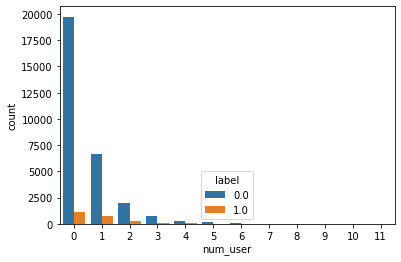

In [ ]:
sns.countplot(x='num_user', hue = 'label', data=df_full)

In [ ]:
words = df_full['clean'].str.split()
words = [word for sublist in words for word in sublist]
words

['when',
 'a',
 'father',
 'is',
 'dysfunctional',
 'and',
 'is',
 'so',
 'selfish',
 'he',
 'drags',
 'his',
 'kids',
 'into',
 'his',
 'dysfunction',
 '#run',
 'thanks',
 'for',
 '#lyft',
 'credit',
 'i',
 "can't",
 'use',
 'cause',
 'they',
 "don't",
 'offer',
 'wheelchair',
 'vans',
 'in',
 'pdx',
 '#disapointed',
 '#getthanked',
 'bihday',
 'your',
 'majesty',
 '#model',
 'i',
 'love',
 'u',
 'take',
 'with',
 'u',
 'all',
 'the',
 'time',
 'in',
 'urð\x9f\x93±',
 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91',
 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦',
 'factsguide',
 'society',
 'now',
 '#motivation',
 '22',
 'huge',
 'fan',
 'fare',
 'and',
 'big',
 'talking',
 'before',
 'they',
 'leave',
 'chaos',
 'and',
 'pay',
 'disputes',
 'when',
 'they',
 'get',
 'there',
 '#allshowandnogo',
 'camping',
 'tomorrow',
 'dannyâ\x80¦',
 'the',
 'next',
 'school',
 'year',
 'is',
 'the',
 'year',
 'for',
 'examsð\x9f\x98¯',
 "can't",
 'think',
 'about',
 'that',
 'ð\x9f\x98\xad',
 '#school',
 '#

In [ ]:
len(words)

609862

In [ ]:
from collections import Counter
word_counts = Counter(words)
word_counts.most_common(100)


[('the', 15554),
 ('to', 15028),
 ('a', 9589),
 ('i', 8884),
 ('you', 8196),
 ('and', 7543),
 ('in', 6990),
 ('for', 6963),
 ('is', 6442),
 ('of', 6412),
 ('my', 5570),
 ('this', 4066),
 ('on', 4025),
 ('it', 3849),
 ('with', 3839),
 ('be', 3715),
 ('so', 2998),
 ('all', 2958),
 ('day', 2943),
 ('are', 2863),
 ('that', 2839),
 ('your', 2619),
 ('at', 2539),
 ('have', 2466),
 ('amp', 2380),
 ('happy', 2377),
 ('me', 2306),
 ('#love', 2246),
 ('just', 2066),
 ('we', 2038),
 ('will', 1942),
 ('when', 1876),
 ('not', 1858),
 ('love', 1851),
 ('am', 1812),
 ('do', 1811),
 ('u', 1754),
 ('time', 1666),
 ('what', 1651),
 ('from', 1634),
 ("it's", 1598),
 ('but', 1584),
 ("i'm", 1541),
 ('up', 1534),
 ('now', 1460),
 ('new', 1421),
 ('today', 1415),
 ('like', 1409),
 ('out', 1403),
 ('get', 1398),
 ('was', 1385),
 ('â\x80¦', 1383),
 ('as', 1375),
 ('about', 1326),
 ('#positive', 1324),
 ('our', 1314),
 ('how', 1309),
 ('by', 1298),
 ('no', 1200),
 ('people', 1200),
 ('one', 1200),
 ('good', 11

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
words_stop = stopwords.words('english') + ['can\'t', 'u']
words_stop

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
df_full['clean'] = df_full['clean'].apply(lambda x: ' '.join([word for word in x.split() if not word in words_stop]))
df_full.head(50)

,id,label,tweet,Dataset,clean,num_user
0,1,0.0,@user when a father is dysfunctional and is s...,train,father dysfunctional selfish drags kids dysfun...,1
1,2,0.0,@user @user thanks for #lyft credit i can't us...,train,thanks #lyft credit use cause offer wheelchair...,2
2,3,0.0,bihday your majesty,train,bihday majesty,0
3,4,0.0,#model i love u take with u all the time in ...,train,#model love take time urð± ðððð ð...,0
4,5,0.0,factsguide: society now #motivation,train,factsguide society #motivation,0
5,6,0.0,[2/2] huge fan fare and big talking before the...,train,22 huge fan fare big talking leave chaos pay d...,0
6,7,0.0,@user camping tomorrow @user @user @user @use...,train,camping tomorrow dannyâ¦,8
7,8,0.0,the next school year is the year for exams.ð...,train,next school year year examsð¯ think ð­ #sc...,0
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,train,love land #allin #cavs #champions #cleveland #...,0
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,train,welcome i'm #gr8,2


In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
s = 'consult consultant consulting consultants consultantative'
[ps.stem(w) for w in s.split()]

['consult', 'consult', 'consult', 'consult', 'consult']

In [ ]:
df_full['clean'] = df_full['clean'].apply(lambda x: ' '.join([ps.stem(w) for w in x.split()]))
df_full.head(50)

,id,label,tweet,Dataset,clean,num_user
0,1,0.0,@user when a father is dysfunctional and is s...,train,father dysfunct selfish drag kid dysfunct #run,1
1,2,0.0,@user @user thanks for #lyft credit i can't us...,train,thank #lyft credit use caus offer wheelchair v...,2
2,3,0.0,bihday your majesty,train,bihday majesti,0
3,4,0.0,#model i love u take with u all the time in ...,train,#model love take time urð± ðððð ð...,0
4,5,0.0,factsguide: society now #motivation,train,factsguid societi #motiv,0
5,6,0.0,[2/2] huge fan fare and big talking before the...,train,22 huge fan fare big talk leav chao pay disput...,0
6,7,0.0,@user camping tomorrow @user @user @user @use...,train,camp tomorrow dannyâ¦,8
7,8,0.0,the next school year is the year for exams.ð...,train,next school year year examsð¯ think ð­ #sc...,0
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,train,love land #allin #cav #champion #cleveland #cl...,0
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,train,welcom i'm #gr8,2


In [ ]:
words = df_full['clean'].str.split()
words = [word for sublist in words for word in sublist]

In [ ]:
from collections import Counter
word_counts = Counter(words)
word_counts.most_common(20)


[('day', 3642),
 ('happi', 2617),
 ('amp', 2380),
 ('love', 2362),
 ('#love', 2358),
 ('get', 1911),
 ('time', 1831),
 ('go', 1690),
 ('thank', 1568),
 ("i'm", 1541),
 ('make', 1507),
 ('like', 1484),
 ('today', 1431),
 ('new', 1421),
 ('â\x80¦', 1383),
 ('#posit', 1382),
 ('see', 1280),
 ('one', 1275),
 ('good', 1214),
 ('peopl', 1207)]